<a href="https://colab.research.google.com/github/catabia/cs391_spring21/blob/main/company_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import math
from matplotlib import dates
import datetime
import pickle
import re

import nltk
import string
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import wordcloud

from nltk.probability import FreqDist

#pandas!
pd.set_option('display.max_rows', 500) 

#well well well

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocess review text

> Read about it here:  https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f




In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/hannah_research/data/company_indeed2.pkl")
df.columns

Index(['index', 'platform', 'scrape_company_num', 'date_scraped',
       'scrape_folder_name', 'scrape_file_name', 'base_url', 'page_num',
       'parent_company', 'be_careful', 'company_name', 'scraped_from_url',
       'empid', 'language', 'id', 'review_url', 'uid', 'review_date',
       'review_month', 'review_day', 'review_year', 'parsable_loc', 'state',
       'city', 'country', 'location', 'job_title', 'norm_job_title', 'current',
       'length_of_employment', 'overall_rating', 'work_life_rating',
       'compensation_rating', 'job_security_rating', 'management_rating',
       'culture_rating', 'review_title', 'review_text', 'pros', 'cons',
       'advice_to_management', 'helpful_yes', 'helpful_no', 'recommend',
       'ceo_approval', 'business_outlook', 'redacted', 'is_deletable',
       'job_code', 'month_year', 'review_quarter', 'year_q', 'year_quarter',
       'manager', 'latitude', 'longitude', 'fips', 'comuting_zone',
       'walmart_in_target_cz', 'walmart_samsclub_in_tar

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# gather the text
df[['review_title', 'review_text', 'pros', 'cons' ]] = df[['review_title', 'review_text', 'pros', 'cons' ]].fillna('')

df['text'] = df.review_title +  ' ' + df.review_text + ' ' + df.pros + ' ' + df.cons
print(df.text[:10])

16     hard work. Most mangers are unappreciative Har...
18     Walmart It was a horrible place to work and th...
24     Its convenient Ive been at the job for 2 years...
47     productive and fun workplace Target really car...
60     Okay Overall Working here is fun for the most ...
70     Red card Red Card At Target it was a great pla...
71     It’s awesome I began this job when I was 6 mon...
88     Always been very supportive Good learning basi...
101    Poor management overall would not recommend Ma...
108    Great management people I LOVE WORKING AT SAMS...
Name: text, dtype: object


In [ ]:
def to_tokens(text):
  # remove punctuation
  t = ''.join([c for c in text if c not in string.punctuation])
  # lowercase
  t = t.lower()
  # tokenize
  tokenizer = RegexpTokenizer(r'\w+')
  t = tokenizer.tokenize(t)
  #remove stopwords
  word = ' '.join([w for w in t if w not in stopwords.words('english')])
  return word

df['tokens'] = df.text.apply(lambda x: to_tokens(x))


df.tokens

16        hard work mangers unappreciative hard hot plac...
18        walmart horrible place work good people manage...
24        convenient ive job 2 years convenient hours ru...
47        productive fun workplace target really cares e...
60        okay overall working fun part guests tend forg...
70        red card red card target great place learn rea...
71        awesome began job 6 months pregnant pregnancy ...
88        always supportive good learning basis bigger b...
101       poor management overall would recommend manage...
108       great management people love working sams trea...
110                    retail retail thought work currently
119       cashier good place work help employees would n...
126       job hard make full time hours unless fill cert...
127       good people unorganized transferred major city...
131       great need job good temporary job however woul...
139       love amazon amazon consist wonderful people ma...
144       enjoyable part job enjoyable p

In [ ]:
def to_bow(tokens):
  # get your list back!
  t = tokens.split(' ')
  # stemming
  stemmer= PorterStemmer()
  t = [stemmer.stem(i) for i in t]
  return t

df['bow']= df.tokens.apply(lambda x: to_bow(x))

print(df.bow)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def remove_duplicates(bow):
  bow = list(set(bow))
  return bow

df['bow_no_duplicates'] = df.bow.apply(lambda x: remove_duplicates(x))

In [ ]:
df.columns

Index(['index', 'platform', 'scrape_company_num', 'date_scraped',
       'scrape_folder_name', 'scrape_file_name', 'base_url', 'page_num',
       'parent_company', 'be_careful', 'company_name', 'scraped_from_url',
       'empid', 'language', 'id', 'review_url', 'uid', 'review_date',
       'review_month', 'review_day', 'review_year', 'parsable_loc', 'state',
       'city', 'country', 'location', 'job_title', 'norm_job_title', 'current',
       'length_of_employment', 'overall_rating', 'work_life_rating',
       'compensation_rating', 'job_security_rating', 'management_rating',
       'culture_rating', 'review_title', 'review_text', 'pros', 'cons',
       'advice_to_management', 'helpful_yes', 'helpful_no', 'recommend',
       'ceo_approval', 'business_outlook', 'redacted', 'is_deletable',
       'job_code', 'month_year', 'review_quarter', 'year_q', 'year_quarter',
       'manager', 'latitude', 'longitude', 'fips', 'comuting_zone',
       'walmart_in_target_cz', 'walmart_samsclub_in_tar

### Reference words

In [ ]:
def ref_finder(bow, ref_words):
  for word in ref_words:
    if word in bow:
      return 1
  return 0

In [ ]:
walmart_reference_words = ['walmarts', 'walmart', 'wal', 'samsclub', 'samsclubs', 'sams']
df['ref_walmart']= df.bow_no_duplicates.apply(lambda x: ref_finder(x, walmart_reference_words))
sum(df.ref_walmart)

16220

In [ ]:
target_reference_words = ['target', 'targets']
df['ref_target']= df.bow_no_duplicates.apply(lambda x: ref_finder(x, target_reference_words))
sum(df.ref_target)

6162

In [ ]:
amazon_reference_words = ['amazon', 'amazons', 'amazon.com', 'amazon.coms']
df['ref_amazon']= df.bow_no_duplicates.apply(lambda x: ref_finder(x, amazon_reference_words))
sum(df.ref_amazon)

6125

In [ ]:
wholefoods_reference_words = ['wholefoods']
df['ref_wholefoods']= df.bow_no_duplicates.apply(lambda x: ref_finder(x, wholefoods_reference_words))
sum(df.ref_wholefoods)

0

In [ ]:
df.columns

Index(['index', 'platform', 'scrape_company_num', 'date_scraped',
       'scrape_folder_name', 'scrape_file_name', 'base_url', 'page_num',
       'parent_company', 'be_careful', 'company_name', 'scraped_from_url',
       'empid', 'language', 'id', 'review_url', 'uid', 'review_date',
       'review_month', 'review_day', 'review_year', 'parsable_loc', 'state',
       'city', 'country', 'location', 'job_title', 'norm_job_title', 'current',
       'length_of_employment', 'overall_rating', 'work_life_rating',
       'compensation_rating', 'job_security_rating', 'management_rating',
       'culture_rating', 'review_title', 'review_text', 'pros', 'cons',
       'advice_to_management', 'helpful_yes', 'helpful_no', 'recommend',
       'ceo_approval', 'business_outlook', 'redacted', 'is_deletable',
       'job_code', 'month_year', 'review_quarter', 'year_q', 'year_quarter',
       'manager', 'latitude', 'longitude', 'fips', 'comuting_zone',
       'walmart_in_target_cz', 'walmart_samsclub_in_tar

# **CHECKPOINT CHARLIE**

In [ ]:
gf=df

In [ ]:
# **CHECKPOINT CHARLIE!!**

#df.to_pickle("/content/drive/MyDrive/hannah_research/data/company_indeed3.pkl")

df = pd.read_pickle("/content/drive/MyDrive/hannah_research/data/company_indeed3.pkl")
df.columns

Index(['index', 'platform', 'scrape_company_num', 'date_scraped',
       'scrape_folder_name', 'scrape_file_name', 'base_url', 'page_num',
       'parent_company', 'be_careful', 'company_name', 'scraped_from_url',
       'empid', 'language', 'id', 'review_url', 'uid', 'review_date',
       'review_month', 'review_day', 'review_year', 'parsable_loc', 'state',
       'city', 'country', 'location', 'job_title', 'norm_job_title', 'current',
       'length_of_employment', 'overall_rating', 'work_life_rating',
       'compensation_rating', 'job_security_rating', 'management_rating',
       'culture_rating', 'review_title', 'review_text', 'pros', 'cons',
       'advice_to_management', 'helpful_yes', 'helpful_no', 'recommend',
       'ceo_approval', 'business_outlook', 'redacted', 'is_deletable',
       'job_code', 'month_year', 'review_quarter', 'year_q', 'year_quarter',
       'manager', 'latitude', 'longitude', 'fips', 'comuting_zone',
       'walmart_in_target_cz', 'walmart_samsclub_in_tar

## **Company References**

### Target

In [ ]:
wal = df[df.company_name.isin(['Walmart', 'Sams Club'])]
wal = wal[wal.month_year >= '2017-01']
wal = wal.groupby(['month_year']).sum().ref_target
wal = wal.reset_index()
#wal

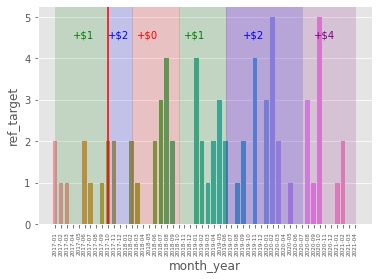

In [ ]:
plt = sns.barplot(x='month_year', y ='ref_target',  data = wal)
plt.tick_params(axis='x', rotation=90, labelsize='xx-small')

plt.axvspan(0,9, alpha=.15, color='green')
plt.text(s='+$1', y=4.5, x=3, color='green', fontsize=10)

plt.axvspan(9, 13, alpha=.15, color='blue')
plt.text(s='+$2', y=4.5, x=9, color='blue', fontsize=10)

plt.axvspan(13, 21, alpha=.15, color='red')
plt.text(s='+$0', y=4.5, x=14, color='red', fontsize=10)

plt.axvspan(21, 29, alpha=.15, color='green')
plt.text(s='+$1', y=4.5, x=22, color='green', fontsize=10)

plt.axvspan(29, 42, alpha=.15, color='blue')
plt.text(s='+$2', y=4.5, x=32, color='blue', fontsize=10)

plt.axvspan(29, 51, alpha=.15, color='purple')
plt.text(s='+$4', y=4.5, x=44, color='purple', fontsize=10)

plt.axvline(9, color='red')

In [ ]:
wal = df[df.company_name.isin(['Walmart', 'Sams Club'])]
wal = wal[wal.month_year >= '2017-01']
wal = wal.groupby(['month_year', 'walmart_in_target_cz']).sum().ref_target
wal = wal.reset_index()
#wal

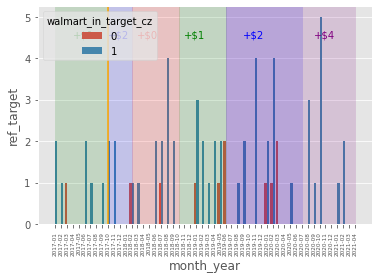

In [ ]:
plt = sns.barplot(x='month_year', y ='ref_target', hue='walmart_in_target_cz',  data = wal)
plt.tick_params(axis='x', rotation=90, labelsize='xx-small')

plt.axvspan(0,9, alpha=.15, color='green')
plt.text(s='+$1', y=4.5, x=3, color='green', fontsize=10)

plt.axvspan(9, 13, alpha=.15, color='blue')
plt.text(s='+$2', y=4.5, x=9, color='blue', fontsize=10)

plt.axvspan(13, 21, alpha=.15, color='red')
plt.text(s='+$0', y=4.5, x=14, color='red', fontsize=10)

plt.axvspan(21, 29, alpha=.15, color='green')
plt.text(s='+$1', y=4.5, x=22, color='green', fontsize=10)

plt.axvspan(29, 42, alpha=.15, color='blue')
plt.text(s='+$2', y=4.5, x=32, color='blue', fontsize=10)

plt.axvspan(29, 51, alpha=.15, color='purple')
plt.text(s='+$4', y=4.5, x=44, color='purple', fontsize=10)

plt.axvline(9, color='orange')

### Amazon

In [ ]:
wal = df[df.company_name.isin(['Walmart', 'Sams Club'])]
wal = wal[wal.month_year >= '2017-01']
wal = wal.groupby(['month_year']).sum().ref_amazon
wal = wal.reset_index()

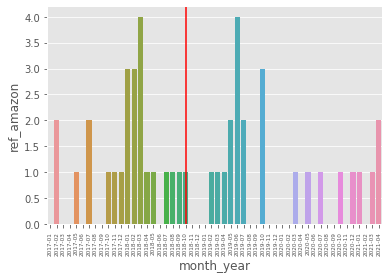

In [ ]:
plt= sns.barplot(x='month_year', y ='ref_amazon', data = wal)
plt.tick_params(axis='x', rotation=90, labelsize='xx-small')
plt.axvline(21, color='red')

## **Amazon**

In [ ]:
amazon_pre =df[df.review_date<'2018-10-01']
amazon_pre =amazon_pre[amazon_pre.review_date>='2017-01-01']
amazon_pre = amazon_pre[amazon_pre.company_name=='Amazon.com']
print(amazon_pre.shape)
amazon_pre.bow = amazon_pre.bow.apply(lambda x: ' '.join(x))
amazon_pre = ' '.join(amazon_pre.bow.to_list())
amazon_pre = amazon_pre.split(' ')

(5176, 70)


In [ ]:
amazon_post =df[df.review_date>='2018-10-01']
amazon_post =amazon_post[amazon_post.review_date<'2020-03-01']
amazon_post = amazon_post[amazon_post.company_name=='Amazon.com']
print(amazon_post.shape)
amazon_post.bow = amazon_post.bow.apply(lambda x: ' '.join(x))
amazon_post = ' '.join(amazon_post.bow.to_list())
amazon_post = amazon_post.split(' ')
#amazon_post

(5718, 70)


In [ ]:
pre_dist = dict(nltk.FreqDist(amazon_pre))
pre_dist = {key: value / 5176 for key, value in pre_dist.items()}
post_dist = dict(nltk.FreqDist(amazon_post))
post_dist = {key: value / 5718 for key, value in post_dist.items()}


In [ ]:
for key in pre_dist.keys():
  if key not in post_dist:
    post_dist[key]= 0

In [ ]:
for key in post_dist.keys():
  if key not in pre_dist:
    #print(key)
    pre_dist[key]= 0

In [ ]:
delta = {}
for key in post_dist.keys():
  delta[key] = post_dist[key] - pre_dist[key]

print(delta)

{'love': 0.028013707627908946, 'amazon': 0.01942609985117094, 'consist': -0.0004038333352254578, 'wonder': 0.001443014899666065, 'peopl': -0.008822704191271069, 'make': -0.020765183079221095, 'feel': -0.000771986616736213, 'like': 0.02705575224635673, 'famili': 0.0006875843684603505, 'alway': -0.011630616297242963, 'new': -0.0052192890695236666, 'thing': 0.0017752178240248995, 'learn': -0.027970188774514487, 'work': -0.12608053799033714, 'done': -0.001057629774031732, 'benefit': -0.12626772312062073, 'except': -9.61604477954861e-05, 'amaz': 0.0010758076801856281, 'full': 0.0064441690953430525, 'time': -0.07311255218883617, 'employe': -0.010144690726916206, 'give': 0.004386686906988055, 'plenti': -0.005015885733006157, 'take': 0.0015445138403469005, 'breavment': 0.00017488632388947185, 'schedul': 0.008798174154342184, 'shift': 0.018829742892776585, 'paid': -0.022051421985292252, 'vacat': -0.012558905876558907, 'person': 0.00046228645352699993, 'terribl': -0.005886668256050876, 'place': 

In [ ]:
d = [w + ': ' + str(delta[w]) for w in sorted(delta, key=delta.get, reverse=True)]
#d

In [ ]:
d[:50]

['love: 0.028013707627908946',
 'like: 0.02705575224635673',
 'deliveri: 0.02457288002365696',
 'compani: 0.024218985248460223',
 'driver: 0.022805703726889733',
 'safeti: 0.021362621251364358',
 'amazon: 0.01942609985117094',
 'shift: 0.018829742892776585',
 'packag: 0.01756452007895022',
 'flexibl: 0.016104070607582663',
 'rout: 0.013591667734365244',
 '15: 0.013360896174827941',
 'flex: 0.01150952035736277',
 'u: 0.011100213377533353',
 'locat: 0.010717463710412035',
 'point: 0.010683608204898654',
 'season: 0.0103685695488041',
 'experi: 0.010043462089672633',
 'deliv: 0.009148081953839742',
 'stop: 0.009089493683819583',
 'van: 0.008892645205654965',
 'issu: 0.00882027146033594',
 'schedul: 0.008798174154342184',
 'suck: 0.008706744016698263',
 'talk: 0.008703973406466631',
 'im: 0.008685660348594124',
 'horribl: 0.008460430009520088',
 'extra: 0.008313925546540032',
 'away: 0.008082275500831723',
 'realli: 0.008026255113465275',
 'care: 0.0075721453389145515',
 'opportun: 0.00752

In [ ]:
d[-50:]

['feet: -0.01264959267975043',
 'requir: -0.012669730285824257',
 'perform: -0.013016732323371572',
 'insur: -0.0133033215426974',
 'school: -0.013462665418945998',
 'bore: -0.01363478113260384',
 'hard: -0.014100243651518324',
 'mani: -0.014697952127098846',
 'meet: -0.015543055823606475',
 'poor: -0.01613542580630164',
 'walk: -0.016193135590150794',
 'lack: -0.016617038955590767',
 'free: -0.016763543418570816',
 'week: -0.018005249833357925',
 'room: -0.019515975744050756',
 'lot: -0.019797294046350555',
 'make: -0.020765183079221095',
 'paid: -0.022051421985292252',
 'depart: -0.022364500941466872',
 'associ: -0.023445038931804052',
 'job: -0.024205132197302026',
 'typic: -0.02523410980698712',
 'stock: -0.02708366107625098',
 'learn: -0.027970188774514487',
 '10: -0.02890679018452534',
 'great: -0.02894051053832014',
 'enjoy: -0.029373806948203907',
 'lunch: -0.03119950393913199',
 'stress: -0.031225182765669074',
 'low: -0.03311129257481864',
 'advanc: -0.03385401884447442',
 'h

In [ ]:
print('pre: ', pre_dist['pay'])
print('post: ', post_dist['pay'])
print('delta:', delta['pay'])

pre:  0.34370170015455953
post:  0.2990556138509968
delta: -0.044646086303562704


In [ ]:
print('pre: ', pre_dist['money'])
print('post: ', post_dist['money'])
print('delta:', delta['money'])

pre:  0.047527047913446675
post:  0.05071703392794683
delta: 0.003189986014500157


In [ ]:
print('pre: ', pre_dist['benefit'])
print('post: ', post_dist['benefit'])
print('delta:', delta['benefit'])

pre:  0.3892967542503864
post:  0.26302903112976567
delta: -0.12626772312062073


In [ ]:
print('pre: ', pre_dist['15'])
print('post: ', post_dist['15'])
print('delta:', delta['15'])

pre:  0.028786707882534776
post:  0.04214760405736272
delta: 0.013360896174827941


## **Whole Foods**

In [ ]:
wf_pre =df[df.review_date<'2018-10-01']
wf_pre =wf_pre[wf_pre.review_date>='2017-01-01']
wf_pre = wf_pre[wf_pre.company_name=='Whole Foods Market']
print(wf_pre.shape)
wf_pre.bow = wf_pre.bow.apply(lambda x: ' '.join(x))
wf_pre = ' '.join(wf_pre.bow.to_list())
wf_pre = wf_pre.split(' ')

(1103, 70)


In [ ]:
wf_post =df[df.review_date>='2018-10-01']
wf_post =wf_post[wf_post.review_date<'2020-03-01']
wf_post = wf_post[wf_post.company_name=='Whole Foods Market']
print(wf_post.shape)
wf_post.bow = wf_post.bow.apply(lambda x: ' '.join(x))
wf_post = ' '.join(wf_post.bow.to_list())
wf_post = wf_post.split(' ')
#wf_post

(801, 70)


In [ ]:
pre_dist = dict(nltk.FreqDist(wf_pre))
pre_dist = {key: value / 1103 for key, value in pre_dist.items()}
post_dist = dict(nltk.FreqDist(wf_post))
post_dist = {key: value / 801 for key, value in post_dist.items()}


In [ ]:
for key in pre_dist.keys():
  if key not in post_dist:
    post_dist[key]= 0

In [ ]:
for key in post_dist.keys():
  if key not in pre_dist:
    #print(key)
    pre_dist[key]= 0

In [ ]:
delta = {}
for key in post_dist.keys():
  delta[key] = post_dist[key] - pre_dist[key]

print(delta)

{'trustworthi': 0.0012484394506866417, 'fun': -0.060776250901242, 'workplac': -0.009171445937365241, 'your': 0.014460618696257962, 'treat': 0.007088827089438289, 'proper': -0.00532086478483944, 'respect': 0.00014827340710784134, 'shown': 0.0031805211753666938, 'interact': -0.010968836551771752, 'refer': 0.0003418211369967052, 'team': 0.013117103167731181, 'member': -0.010184458909590549, 'higherup': -0.0005647971766932314, 'leader': 0.014162940023972753, 'way': -0.001278999618563828, 'show': 0.003551770622171064, 'regardless': 0.0010254634109901155, 'posit': -0.013883371080799956, 'togeth': 0.006375756505637219, 'whole': 0.014707363755414482, 'food': -0.03523247798819018, 'famili': -0.00695639969530381, 'chill': 0.0045478057233535145, 'environ': -0.01152231514776969, 'one': 0.03840281244093115, 'sweetest': 0.0012484394506866417, 'calm': -0.0014714154903831679, 'work': -0.10067085227780792, 'ever': 0.010611169401801693, 'meet': -0.01319859694873702, 'realli': 0.02095408844112584, 'good'

In [ ]:
d = [w + ': ' + str(delta[w]) for w in sorted(delta, key=delta.get, reverse=True)]
#d

In [ ]:
d[:50]

['amazon: 0.062391412366454894',
 'get: 0.04125396291806588',
 'one: 0.03840281244093115',
 'experi: 0.03644130240644344',
 'take: 0.034137971234959014',
 'hour: 0.033393208625211224',
 'expect: 0.03161166402377807',
 'pay: 0.03018212728196737',
 'need: 0.025145358872578807',
 'hire: 0.02489408638114415',
 'even: 0.024373431669162407',
 'locat: 0.02422515826205457',
 '15: 0.023393242580953322',
 'shift: 0.022099528807485648',
 'supervisor: 0.02137174406878075',
 'realli: 0.02095408844112584',
 'like: 0.020462862038951785',
 'feel: 0.020405137277405963',
 'best: 0.020107458605120754',
 'excel: 0.020033887830601595',
 'sinc: 0.019454376499004528',
 'matter: 0.018280639680906572',
 'appli: 0.01783468760151352',
 'welcom: 0.017611711561816994',
 'bad: 0.01756643723903597',
 'prepar: 0.017522294774324477',
 'care: 0.01714991346945058',
 'move: 0.017031068372150404',
 'go: 0.016941651584657894',
 'easi: 0.016763949867742378',
 'back: 0.01539666531975556',
 'tri: 0.014921284930554848',
 'whol

In [ ]:
d[-50:]

['look: -0.014313477147219651',
 'im: -0.014476464709231321',
 'healthcar: -0.014833000001131857',
 'open: -0.014907702633720543',
 'co: -0.014937130943528205',
 'cowork: -0.015473631668483312',
 'lot: -0.016039560703246053',
 'alway: -0.01612784563266903',
 'lunch: -0.016156142084407188',
 'low: -0.016393832279007543',
 'thing: -0.016513809234377244',
 'wonder: -0.016631522473607902',
 'world: -0.01732987890250514',
 '401k: -0.01732987890250514',
 'relax: -0.017419295689997658',
 'region: -0.01743400984490149',
 'atmospher: -0.01762755757479035',
 'deal: -0.017865247769390708',
 'cool: -0.0186677351406843',
 'sale: -0.018905425335284658',
 'enjoy: -0.019278938498228093',
 'pace: -0.01993202060434429',
 'leadership: -0.02015499664404083',
 'item: -0.021967101413351172',
 'provid: -0.02250247028023674',
 'balanc: -0.023304957651530327',
 'market: -0.023529065549296388',
 'organ: -0.02557886051320709',
 'short: -0.025995384282792473',
 'custom: -0.026014625869974384',
 'life: -0.02678315

In [ ]:
print('pre: ', pre_dist['pay'])
print('post: ', post_dist['pay'])
print('delta:', delta['pay'])

pre:  0.2257479601087942
post:  0.25593008739076156
delta: 0.03018212728196737


In [ ]:
print('pre: ', pre_dist['money'])
print('post: ', post_dist['money'])
print('delta:', delta['money'])

pre:  0.019945602901178604
post:  0.019975031210986267
delta: 2.9428309807663644e-05


In [ ]:
print('pre: ', pre_dist['benefit'])
print('post: ', post_dist['benefit'])
print('delta:', delta['benefit'])

pre:  0.2756119673617407
post:  0.21098626716604243
delta: -0.06462570019569827


In [ ]:
print('pre: ', pre_dist['15'])
print('post: ', post_dist['15'])
print('delta:', delta['15'])

pre:  0.009066183136899365
post:  0.03245942571785269
delta: 0.023393242580953322
